**Importing Libraries**

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

**Importing Data**

In [300]:
df = pd.read_csv('credit_risk_data.csv')

In [301]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Dropping the "Unnamed: 0" feature as it is the ID of the individual

In [302]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [303]:
print(f"Percentage of Respondents w/ Financial Distress: {round(len(df[df['SeriousDlqin2yrs'] == 1]) / df.shape[0] * 100, 2)} %")

Percentage of Respondents w/ Financial Distress: 6.68 %


Unfortunately, the low percentage of respondents with financial distress (Y = 1) could limit the accuracy of the model.

**Splitting Data into Train Set & Test Set**

In [304]:
X = df.copy()
y = X.pop('SeriousDlqin2yrs')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [305]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 130013 to 92634
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 1   age                                   120000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 3   DebtRatio                             120000 non-null  float64
 4   MonthlyIncome                         96173 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 6   NumberOfTimes90DaysLate               120000 non-null  int64  
 7   NumberRealEstateLoansOrLines          120000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 9   NumberOfDependents                    116839 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 10.1 MB


In [306]:
X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           23827
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3161
dtype: int64

MonthlyIncome and NumberOfDependents have missing values

**Imputing Missing Values of MonthlyIncome**

In [307]:
X_train[X_train["MonthlyIncome"].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
130013,0.851913,49,1,826.0,NaN,4,3,0,0,0.0
86623,0.227663,40,0,1635.0,NaN,13,0,1,0,3.0
134658,1.000000,71,0,255.0,NaN,2,0,0,0,0.0
116543,0.048633,58,0,2793.0,NaN,11,0,1,0,0.0
122252,0.660054,55,0,1198.0,NaN,5,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
116541,0.089112,47,0,1330.0,NaN,5,0,2,0,2.0
111571,0.015624,63,0,4732.0,NaN,8,0,3,0,0.0
91930,0.104638,76,0,84.0,NaN,7,0,0,0,0.0
52386,0.798345,57,0,7504.0,NaN,20,0,2,0,0.0


In [308]:
X_train[X_train["MonthlyIncome"] == 0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
137539,0.457398,48,0,2798.0,0.0,19,0,1,0,0.0
62260,0.922156,22,0,13.0,0.0,1,0,0,0,0.0
16900,0.063108,43,0,1510.0,0.0,3,0,1,0,2.0
12378,0.069497,62,0,3286.0,0.0,5,0,1,0,0.0
137830,1.000000,41,0,2014.0,0.0,2,0,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...
22696,0.021641,44,0,1193.0,0.0,8,0,1,0,3.0
52961,0.007075,80,0,3617.0,0.0,11,0,5,0,0.0
64332,0.011259,75,0,18.0,0.0,8,0,0,0,0.0
36686,0.001950,58,0,1929.0,0.0,9,0,1,0,3.0


In [309]:
X_train[(X_train["MonthlyIncome"] != 0) & (X_train["MonthlyIncome"].notna())]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
103316,0.043998,76,0,0.016284,10500.0,13,0,0,0,0.0
144534,0.102069,53,0,0.055758,8500.0,5,0,0,0,4.0
64954,1.000000,49,0,0.204955,4600.0,2,1,0,0,1.0
92501,0.049996,69,0,0.636678,2600.0,10,0,1,0,0.0
30935,0.005021,61,0,0.305256,12500.0,16,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...
3915,0.039392,52,0,0.163681,4074.0,3,0,1,0,1.0
124308,0.351240,50,1,0.547218,8968.0,12,0,1,0,1.0
31962,0.304313,63,1,0.617769,7000.0,16,0,3,0,0.0
37135,0.296489,45,0,0.531423,6666.0,7,0,2,0,3.0


An interesting pattern is that the DebtRatio of entries with missing MonthlyIncome and zero MonthlyIncome are extremely high, while the DebtRatio of entries with non-zero MonthlyIncome are mostly in the decimal places.

In [310]:
print(f"Median DebtRatio of entries with missing MonthlyIncome: {X_train[X_train['MonthlyIncome'].isna()]['DebtRatio'].median()}")
print(f"Median DebtRatio of entries with zero MonthlyIncome: {X_train[X_train['MonthlyIncome'] == 0]['DebtRatio'].median()}")
print(f"Median DebtRatio of entries with non-zero MonthlyIncome: {X_train[(X_train['MonthlyIncome'] != 0) & (X_train['MonthlyIncome'].notna())]['DebtRatio'].median()}")

Median DebtRatio of entries with missing MonthlyIncome: 1159.0
Median DebtRatio of entries with zero MonthlyIncome: 899.5
Median DebtRatio of entries with non-zero MonthlyIncome: 0.292299701


This supports the fact that the MonthlyIncome for the entries are missing because they are extremely low, so the respondents simply did not report. As such, I will impute missing MonthlyIncome with zero.

In [311]:
def impute_missing_monthly_income(df):
    df.loc[X_train['MonthlyIncome'].isna(), "MonthlyIncome"] = 0

impute_missing_monthly_income(X_train)

**Imputing Missing Values of NumberOfDependents**

In [312]:
X_train[X_train["NumberOfDependents"].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
121488,1.000000,59,0,72.0,0.0,0,0,0,0,NaN
124737,0.000000,36,0,2830.0,0.0,9,0,2,0,NaN
133846,0.056514,27,0,1938.0,0.0,5,0,1,0,NaN
137610,0.000000,75,0,0.0,0.0,3,0,0,0,NaN
33765,0.000800,84,0,0.0,0.0,7,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
131387,0.000955,75,0,0.0,0.0,1,0,0,0,NaN
101559,0.019672,80,0,1879.0,0.0,8,0,1,0,NaN
135216,0.052639,53,0,1618.0,0.0,10,0,1,0,NaN
822,0.000000,90,0,0.0,0.0,3,0,0,0,NaN


In [313]:
X_train[X_train["NumberOfDependents"] == 0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
130013,0.851913,49,1,826.000000,0.0,4,3,0,0,0.0
103316,0.043998,76,0,0.016284,10500.0,13,0,0,0,0.0
134658,1.000000,71,0,255.000000,0.0,2,0,0,0,0.0
92501,0.049996,69,0,0.636678,2600.0,10,0,1,0,0.0
116543,0.048633,58,0,2793.000000,0.0,11,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
80864,0.080413,54,0,0.276396,4583.0,8,0,1,0,0.0
52386,0.798345,57,0,7504.000000,0.0,20,0,2,0,0.0
31962,0.304313,63,1,0.617769,7000.0,16,0,3,0,0.0
23775,0.028373,66,0,38.000000,0.0,5,0,0,0,0.0


In [314]:
X_train[(X_train["NumberOfDependents"] != 0) & (X_train["NumberOfDependents"].notna())]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
86623,0.227663,40,0,1635.000000,0.0,13,0,1,0,3.0
144534,0.102069,53,0,0.055758,8500.0,5,0,0,0,4.0
64954,1.000000,49,0,0.204955,4600.0,2,1,0,0,1.0
59527,0.073542,52,0,0.175254,28666.0,15,0,2,0,3.0
124466,0.164296,50,0,0.473750,4780.0,15,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...
136336,0.601993,55,0,1.188371,3800.0,20,0,2,0,1.0
60534,0.034926,35,0,0.299225,12000.0,20,0,1,0,2.0
3915,0.039392,52,0,0.163681,4074.0,3,0,1,0,1.0
124308,0.351240,50,1,0.547218,8968.0,12,0,1,0,1.0


In [315]:
print(f"The median of all number of dependents in the data: {X_train['NumberOfDependents'].median()}")
print(f"The median monthly income of entries with missing number of dependents: {X_train[X_train['NumberOfDependents'].isna()]['MonthlyIncome'].median()}")

The median of all number of dependents in the data: 0.0
The median monthly income of entries with missing number of dependents: 0.0


I will impute missing values for number of dependents as zero for two reasons. Firstly, the median of the number of dependents is zero, so it would be a natural number to impute as. Secondly, the monthly income of people with missing number of dependents is zero, meaning they probably do not have the financial means to be supporting any dependent.

In [316]:
def impute_missing_num_dependents(df):
    df.loc[X_train["NumberOfDependents"].isna(), "NumberOfDependents"] = 0


In [317]:
impute_missing_num_dependents(X_train)

**Checking & Fixing Outliers**

In [318]:
round(X_train.describe(), 2)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120000.00,120000.00,120000.00,120000.00,120000.00,120000.00,120000.00,120000.00,120000.00,120000.00
mean,5.49,52.31,0.40,354.15,5326.88,8.45,0.25,1.02,0.22,0.74
std,237.06,14.78,3.95,2084.44,10919.39,5.15,3.92,1.13,3.91,1.11
min,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,41.00,0.00,0.17,1550.00,5.00,0.00,0.00,0.00,0.00
50%,0.15,52.00,0.00,0.37,4335.00,8.00,0.00,1.00,0.00,0.00
75%,0.56,63.00,0.00,0.87,7368.00,11.00,0.00,2.00,0.00,1.00
max,50708.00,109.00,98.00,329664.00,1794060.00,57.00,98.00,32.00,98.00,20.00


In [319]:
def draw_boxplots(df):
    cols = df.columns

    fig, axes = plt.subplots(nrows= 2, ncols = 5, figsize=(10, 5))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        ax.boxplot(df[col])
        ax.set_title(col, fontsize = 7)

    plt.tight_layout()
    plt.show()


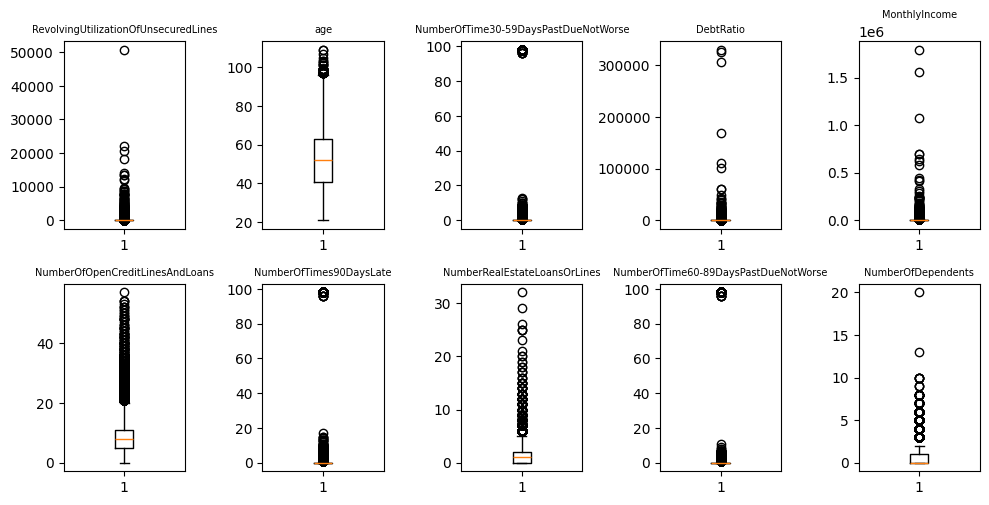

In [320]:
draw_boxplots(X_train)

Every feature has outliers. However, won't fix the outliers for 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',  'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfDependents', because doing so will leave those features with insufficient values (such as all zero).

In [321]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [322]:
def cap_outliers(df):
    cols = ['RevolvingUtilizationOfUnsecuredLines',
            'age',
            'DebtRatio',
            'MonthlyIncome',
            'NumberOfOpenCreditLinesAndLoans',
            'NumberRealEstateLoansOrLines']

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [323]:
cap_outliers(X_train)

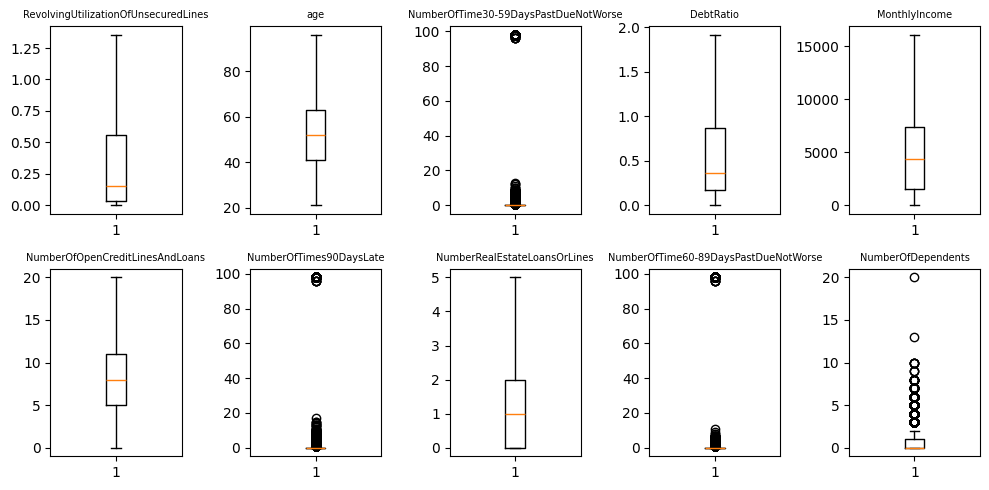

In [324]:
draw_boxplots(X_train)

**Separate Each Feature Into 8 Bins**

Have to bin every feature as they are all continuous. If possible, will bin the data into 8 bins. However, that is not possible as some features have mostly 0 and some other positive values.

In [325]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

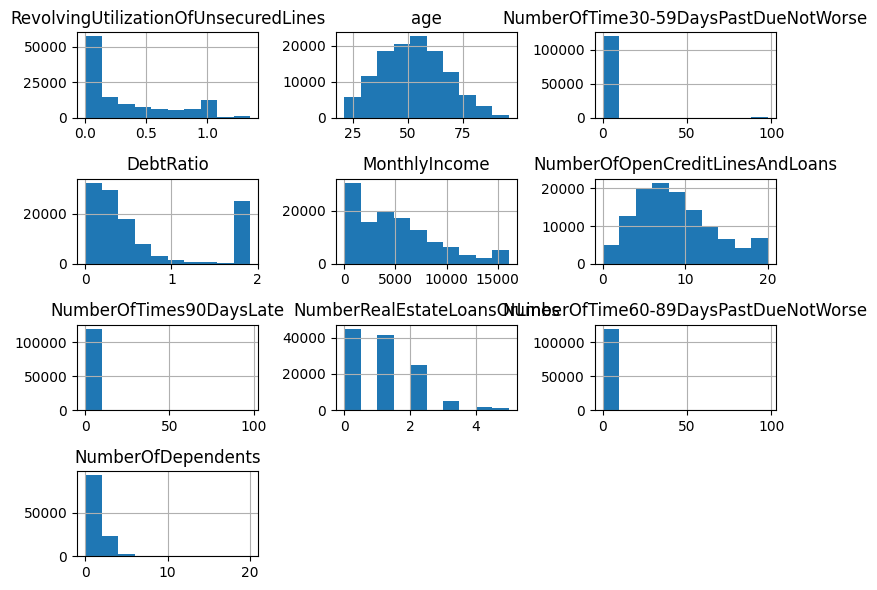

In [326]:
X_train.hist(bins=10, figsize=(8, 6))
plt.tight_layout()
plt.show()

 In particular, 'NumberOfTime30-59DaysPastDueNotWorse' will be binned into 0 or 1+, 'NumberOfTimes90DaysLate' will be binned into 0 or 1+, 'NumberOfTime60-89DaysPastDueNotWorse' will be binned into 0 or 1+, 'NumberOfDependents' will be binned into 0, 1, 2, or 3+ and 'NumberRealEstateLoansOrLines' will be binned into 0, 1, 2, 3 or 4+.

In [327]:
def bin_data(df):
    cols = ['RevolvingUtilizationOfUnsecuredLines',
            'age',
            'DebtRatio',
            'MonthlyIncome',
            'NumberOfOpenCreditLinesAndLoans']

    #'NumberOfTime30-59DaysPastDueNotWorse'
    #'NumberOfTimes90DaysLate'
    #'NumberOfTime60-89DaysPastDueNotWorse'
    #'NumberOfDependents'
    #'NumberRealEstateLoansOrLines'

    for col in cols:
        df[col] = pd.qcut(df[col], q = 6, duplicates="drop")

    df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] != 0, 'NumberOfTime30-59DaysPastDueNotWorse'] = 1

    df.loc[df['NumberOfTimes90DaysLate'] != 0, 'NumberOfTimes90DaysLate'] = 1

    df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] != 0, 'NumberOfTime60-89DaysPastDueNotWorse'] = 1

    df.loc[df['NumberOfDependents'] >= 3 , 'NumberOfDependents'] = 3

    df.loc[df['NumberRealEstateLoansOrLines'] >= 4, 'NumberRealEstateLoansOrLines'] = 4

In [328]:
bin_data(X_train)

In [329]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
130013,"(0.803, 1.355]","(45.0, 52.0]",1,"(0.572, 1.914]","(-0.001, 2700.0]","(-0.001, 4.0]",1,0,0,0.0
86623,"(0.154, 0.381]","(37.0, 45.0]",0,"(0.572, 1.914]","(-0.001, 2700.0]","(10.0, 13.0]",0,1,0,3.0
103316,"(0.0132, 0.0545]","(67.0, 96.0]",0,"(-0.001, 0.104]","(9000.0, 16095.0]","(10.0, 13.0]",0,0,0,0.0
144534,"(0.0545, 0.154]","(52.0, 59.0]",0,"(-0.001, 0.104]","(6138.0, 9000.0]","(4.0, 6.0]",0,0,0,3.0
64954,"(0.803, 1.355]","(45.0, 52.0]",0,"(0.104, 0.238]","(4335.0, 6138.0]","(-0.001, 4.0]",1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
124308,"(0.154, 0.381]","(45.0, 52.0]",1,"(0.367, 0.572]","(6138.0, 9000.0]","(10.0, 13.0]",0,1,0,1.0
31962,"(0.154, 0.381]","(59.0, 67.0]",1,"(0.572, 1.914]","(6138.0, 9000.0]","(13.0, 20.0]",0,3,0,0.0
23775,"(0.0132, 0.0545]","(59.0, 67.0]",0,"(0.572, 1.914]","(-0.001, 2700.0]","(4.0, 6.0]",0,0,0,0.0
37135,"(0.154, 0.381]","(37.0, 45.0]",0,"(0.367, 0.572]","(6138.0, 9000.0]","(6.0, 8.0]",0,2,0,3.0


**Selecting Features Using WoE**

In [330]:
df_inputs_prepr = X_train.copy()
df_targets_prepr = y_train.copy()

In [331]:
def calc_WoE(df, x, y):
    df = pd.concat([df[x], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False, observed = False)[df.columns.values[1]].agg('count'), 
                    df.groupby(df.columns.values[0], as_index = False, observed = False)[df.columns.values[1]].agg('mean')], axis = 1)
    df = df.iloc[ :, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_nondefault']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_nondefault'] = df['prop_nondefault'] * df['n_obs']
    df['n_default'] = (1 - df['prop_nondefault']) * df['n_obs']
    df['prop_n_nondefault'] = df['n_nondefault'] / df['n_nondefault'].sum()
    df['prop_n_default'] = df['n_default'] / df['n_default'].sum()
    df['WoE'] = np.log(df['prop_n_nondefault'] / df['prop_n_default'])
    df['diff_prop_nondefault'] = df['prop_n_nondefault'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_nondefault'] - df['prop_n_default']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [332]:
print(X.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [333]:
df_temp = calc_WoE(df_inputs_prepr, 'RevolvingUtilizationOfUnsecuredLines', df_targets_prepr)
df_temp

,RevolvingUtilizationOfUnsecuredLines,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,"(-0.001, 0.0132]",20000,0.02115,0.166667,423.0,19577.0,0.052618,0.174856,-1.200893,NaN,NaN,1.063106
1,"(0.0132, 0.0545]",20000,0.01505,0.166667,301.0,19699.0,0.037442,0.175945,-1.547367,0.015176,0.346474,1.063106
2,"(0.0545, 0.154]",20000,0.02245,0.166667,449.0,19551.0,0.055853,0.174623,-1.139913,0.018410,0.407454,1.063106
3,"(0.154, 0.381]",20000,0.04040,0.166667,808.0,19192.0,0.100510,0.171417,-0.533841,0.044657,0.606072,1.063106
4,"(0.381, 0.803]",20000,0.09165,0.166667,1833.0,18167.0,0.228013,0.162262,0.340193,0.127503,0.874034,1.063106
5,"(0.803, 1.355]",20000,0.21125,0.166667,4225.0,15775.0,0.525563,0.140897,1.316439,0.297549,0.976246,1.063106


In [334]:
df_temp = calc_WoE(df_inputs_prepr, 'age', df_targets_prepr)
df_temp

,age,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,"(20.999, 37.0]",21096,0.107129,0.175800,2260.0,18836.0,0.281129,0.168237,0.513441,NaN,NaN,0.249633
1,"(37.0, 45.0]",19908,0.087653,0.165900,1745.0,18163.0,0.217067,0.162226,0.291214,0.064063,0.222227,0.249633
2,"(45.0, 52.0]",20833,0.078961,0.173608,1645.0,19188.0,0.204627,0.171381,0.177301,0.012439,0.113913,0.249633
3,"(52.0, 59.0]",19400,0.060773,0.161667,1179.0,18221.0,0.146660,0.162744,-0.104062,0.057967,0.281363,0.249633
4,"(59.0, 67.0]",19866,0.039515,0.165550,785.0,19081.0,0.097649,0.170425,-0.556919,0.049011,0.452856,0.249633
5,"(67.0, 96.0]",18897,0.022490,0.157475,425.0,18472.0,0.052867,0.164986,-1.138076,0.044782,0.581158,0.249633


In [335]:
df_temp = calc_WoE(df_inputs_prepr, 'DebtRatio', df_targets_prepr)
df_temp

,DebtRatio,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,"(-0.001, 0.104]",20000,0.059050,0.166667,1181.0,18819.0,0.146909,0.168085,-0.134660,NaN,NaN,0.021027
1,"(0.104, 0.238]",20000,0.061850,0.166667,1237.0,18763.0,0.153875,0.167585,-0.085352,0.006966,0.049308,0.021027
2,"(0.238, 0.367]",20000,0.054250,0.166667,1085.0,18915.0,0.134967,0.168943,-0.224529,0.018908,0.139178,0.021027
3,"(0.367, 0.572]",20000,0.072850,0.166667,1457.0,18543.0,0.181241,0.165620,0.090133,0.046274,0.314662,0.021027
4,"(0.572, 1.914]",40000,0.076975,0.333333,3079.0,36921.0,0.383008,0.329767,0.149670,0.201766,0.059537,0.021027


In [336]:
df_temp = calc_WoE(df_inputs_prepr, 'MonthlyIncome', df_targets_prepr)
df_temp

,MonthlyIncome,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,"(-0.001, 2700.0]",40050,0.069413,0.333750,2780.0,37270.0,0.345814,0.332884,0.038108,NaN,NaN,0.045684
1,"(2700.0, 4335.0]",19954,0.087702,0.166283,1750.0,18204.0,0.217689,0.162592,0.291820,0.128125,0.253712,0.045684
2,"(4335.0, 6138.0]",20001,0.072146,0.166675,1443.0,18558.0,0.179500,0.165754,0.079669,0.038189,0.212151,0.045684
3,"(6138.0, 9000.0]",20567,0.058054,0.171392,1194.0,19373.0,0.148526,0.173033,-0.152725,0.030974,0.232395,0.045684
4,"(9000.0, 16095.0]",19428,0.044884,0.161900,872.0,18556.0,0.108471,0.165736,-0.423913,0.040055,0.271188,0.045684


In [337]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberOfOpenCreditLinesAndLoans', df_targets_prepr)
df_temp

,NumberOfOpenCreditLinesAndLoans,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,"(-0.001, 4.0]",26936,0.091662,0.224467,2469.0,24467.0,0.307128,0.218531,0.340334,NaN,NaN,0.048757
1,"(4.0, 6.0]",21307,0.058948,0.177558,1256.0,20051.0,0.156238,0.179089,-0.136501,0.150889,0.476835,0.048757
2,"(6.0, 8.0]",20646,0.052456,0.172050,1083.0,19563.0,0.134718,0.174730,-0.260059,0.021520,0.123558,0.048757
3,"(8.0, 10.0]",16770,0.059213,0.139750,993.0,15777.0,0.123523,0.140915,-0.131732,0.011195,0.128327,0.048757
4,"(10.0, 13.0]",16725,0.059253,0.139375,991.0,15734.0,0.123274,0.140531,-0.131019,0.000249,0.000713,0.048757
5,"(13.0, 20.0]",17616,0.070788,0.146800,1247.0,16369.0,0.155119,0.146203,0.059197,0.031845,0.190216,0.048757


In [344]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberOfTime30-59DaysPastDueNotWorse', df_targets_prepr)
df_temp

,NumberOfTime30-59DaysPastDueNotWorse,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,0,100888,0.040332,0.840733,4069.0,96819.0,0.506157,0.864756,-0.53560,NaN,NaN,0.656501
1,1,19112,0.207723,0.159267,3970.0,15142.0,0.493843,0.135244,1.29514,0.012315,1.83074,0.656501


In [338]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberOfTimes90DaysLate', df_targets_prepr)
df_temp

,NumberOfTimes90DaysLate,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,0,113300,0.046514,0.944167,5270.0,108030.0,0.655554,0.96489,-0.386533,NaN,NaN,0.825917
1,1,6700,0.413284,0.055833,2769.0,3931.0,0.344446,0.03511,2.283438,0.311108,2.669971,0.825917


In [339]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberRealEstateLoansOrLines', df_targets_prepr)
df_temp

,NumberRealEstateLoansOrLines,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,0,45010,0.083137,0.375083,3742.0,41268.0,0.465481,0.368593,0.233379,NaN,NaN,0.062008
1,1,41827,0.052167,0.348558,2182.0,39645.0,0.271427,0.354097,-0.265877,0.194054,0.499256,0.062008
2,2,25193,0.057000,0.209942,1436.0,23757.0,0.178629,0.212190,-0.172170,0.092798,0.093707,0.062008
3,3,5046,0.067182,0.042050,339.0,4707.0,0.042169,0.042041,0.003040,0.136460,0.175210,0.062008
4,4,2924,0.116279,0.024367,340.0,2584.0,0.042294,0.023079,0.605698,0.000124,0.602658,0.062008


In [340]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberOfTime60-89DaysPastDueNotWorse', df_targets_prepr)
df_temp

,NumberOfTime60-89DaysPastDueNotWorse,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,0,113968,0.051339,0.949733,5851.0,108117.0,0.727827,0.965667,-0.282755,NaN,NaN,0.559655
1,1,6032,0.362732,0.050267,2188.0,3844.0,0.272173,0.034333,2.070320,0.455654,2.353076,0.559655


In [341]:
df_temp = calc_WoE(df_inputs_prepr, 'NumberOfDependents', df_targets_prepr)
df_temp

,NumberOfDependents,n_obs,prop_nondefault,prop_n_obs,n_nondefault,n_default,prop_n_nondefault,prop_n_default,WoE,diff_prop_nondefault,diff_WoE,IV
0,0.0,72610,0.058174,0.605083,4224.0,68386.0,0.525438,0.610802,-0.150540,NaN,NaN,0.034175
1,1.0,21123,0.073427,0.176025,1551.0,19572.0,0.192934,0.174811,0.098646,0.332504,0.249185,0.034175
2,2.0,15637,0.081665,0.130308,1277.0,14360.0,0.158851,0.128259,0.213913,0.034084,0.115267,0.034175
3,3.0,10630,0.092850,0.088583,987.0,9643.0,0.122776,0.086128,0.354528,0.036074,0.140615,0.034175


We will use "age" (IV = 0.25), 'NumberOfTime30-59DaysPastDueNotWorse' (IV = 0.66) and 'NumberOfTime60-89DaysPastDueNotWorse' (IV = 0.56) for the final model. Unfortunately none of the IVs fall within the optimal range of 0.3 - 0.5

**Apply The Same Preprocess Step on X_Test**

In [ ]:
impute_missing_monthly_income(X_test)
impute_missing_num_dependents(X_test)
cap_outliers(X_test)

**Export Preprocessed Data**

In [ ]:
X_train.to_csv('data/X_train.csv', index = False)
X_test.to_csv('data/X_test.csv', index = False)
y_train.to_csv('data/y_train.csv', index = False)
y_test.to_csv('data/y_test.csv', index = False)